In [21]:
import pandas

In [22]:

def impot(amount: float) -> float:
    '''
    Calculate tax

    Inputs:
        amount: Annual amount gross

    Returns:
        tax amount
    '''
    grid = [
        (0, 0), # (max, percent)
        (10_777, 0),
        (27_478, 0.11),
        (78_570, 0.30),
        (168_994, 0.41),
        (9_999_999_999, 0.45),
    ]

    total_amount = 0
    for i, (max, percent) in enumerate(grid):
        if i == 0:
            continue
        if amount > max:
            total_amount += (grid[i][0] - grid[i-1][0]) * percent
        else:
            total_amount += (amount - grid[i-1][0]) * percent
            return total_amount
    return total_amount

def impot_societe(amount:float) -> float:
    grid = [
        (0, 0),
        (42_500, 0.15),
        (9999999999, 0.25),
    ]

    total_amount = 0
    for i, (max, percent) in enumerate(grid):
        if i == 0:
            continue
        if amount > max:
            total_amount += (grid[i][0] - grid[i-1][0]) * percent
        else:
            total_amount += (amount - grid[i-1][0]) * percent
            return total_amount
    return total_amount

class Salary():
    def __init__(self) -> None:
        self.annual_gross = 0
        self.annual_net = 0
        self.monthly_gross = 0
        self.monthly_net = 0
        self.status_tax = 0.25
        self.annual_taxable = 0

    def set_month_gross(self, amount: float):
        self.monthly_gross = amount
        self.monthly_net = amount * (1 -self.status_tax)
        self.annual_gross = self.monthly_gross * 12
        self.annual_net = self.monthly_net * 12
        self.annual_taxable = self.annual_net * 0.91

    def set_month_net(self, amount:float):
        self.monthly_net = amount
        self.monthly_gross = amount / self.status_tax
        self.annual_gross = self.monthly_gross * 12
        self.annual_net = self.monthly_net * 12
        self.annual_taxable = self.annual_net * 0.91

    def get_monthly_net(self):
        annual_imp = impot(self.annual_taxable)
        return self.monthly_net - annual_imp / 12


class OptmizeIS():
    '''
    The goal is to optimize the salary and the dividends
    based on the ratio point.

    We assume the following
    Total_Charges = Charges + Salary
    Benefice = CA - Total_Charges
    Dividends = 10% CA Max
    Impot_Div = 30% Dividdends
    Treso = Benefice - IS - Div
    
    Default Charges at 10k
    '''
    def __init__(self, ca: float, charges: float = 10_000) -> None:
        self.ca = ca
        self.charges = charges
        self.salary = Salary()

    def get_ratio(self, salary_month_gross:float) -> any:
        charges_salary = salary_month_gross * 12 * 1.75
        benef = self.ca - self.charges - charges_salary
        if benef < 0:
            return {
            'salaire': 0,
            'is': 0,
            'ratio_salaire_is': 0,
            'ratio_salaire_treso': 0,
            'treso': 0
            }
        imp_soc = impot_societe(benef)
        self.salary.set_month_gross(salary_month_gross)
        treso = benef - imp_soc
        return {
            'salaire': salary_month_gross,
            'salaire net apres impot': self.salary.get_monthly_net(),
            'is': imp_soc,
            'ratio_salaire_is': salary_month_gross / imp_soc,
            'ratio_salaire_treso': salary_month_gross / treso,
            'treso': treso
        }
        

In [23]:
impot_societe(50_800)

8450.0

In [24]:
impot(44500)
s = Salary()
s.set_month_gross(100)
s.annual_net

900.0

In [25]:
ca = 138_000
charges = 20_000

month_salary = 1000

output = []
# for i in range(1,40):
#     month_salary += 100
#     cotisation = (month_salary * 12) * 1.75
#     benef = ca - charges - cotisation
#     imp_s = impot_societe(benef)
#     output.append((month_salary, imp_s, benef-imp_s))

opti = OptmizeIS(ca, charges)
month_salary = 0

for i in range(1, 60):
    r = opti.get_ratio(month_salary)
    if r['is'] == 0:
        break
    output.append(r)
    month_salary += 100

In [26]:
df = pandas.DataFrame(output)
df

,salaire,salaire net apres impot,is,ratio_salaire_is,ratio_salaire_treso,treso
0,0,0.000000,25250.0,0.000000,0.000000,92750.0
1,100,75.000000,24725.0,0.004044,0.001097,91175.0
2,200,150.000000,24200.0,0.008264,0.002232,89600.0
3,300,225.000000,23675.0,0.012672,0.003408,88025.0
4,400,300.000000,23150.0,0.017279,0.004627,86450.0
5,500,375.000000,22625.0,0.022099,0.005891,84875.0
6,600,450.000000,22100.0,0.027149,0.007203,83300.0
7,700,525.000000,21575.0,0.032445,0.008565,81725.0
8,800,600.000000,21050.0,0.038005,0.009981,80150.0
9,900,675.000000,20525.0,0.043849,0.011454,78575.0


<Axes: xlabel='salaire'>

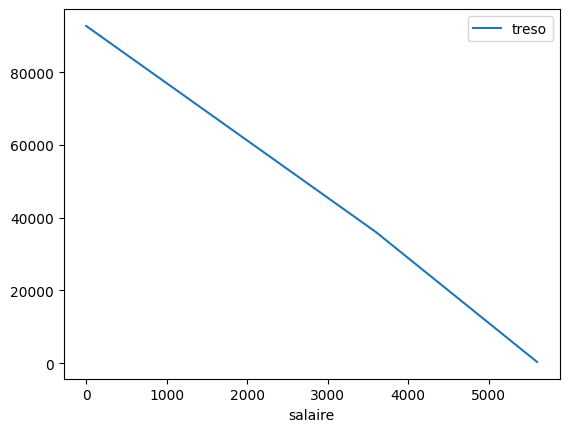

In [29]:
df.plot(x='salaire', y='treso')

In [31]:
tmp = []
for i in range(0, len(df)):
    if df.iloc[i]['salaire net apres impot'] == 0 :
        tmp.append(0)
    else:
        tmp.append(df.iloc[i]['treso'] / df.iloc[i]['salaire net apres impot'])
df['a'] = tmp

In [32]:
df

,salaire,salaire net apres impot,is,ratio_salaire_is,ratio_salaire_treso,treso,a
0,0,0.000000,25250.0,0.000000,0.000000,92750.0,0.000000
1,100,75.000000,24725.0,0.004044,0.001097,91175.0,1215.666667
2,200,150.000000,24200.0,0.008264,0.002232,89600.0,597.333333
3,300,225.000000,23675.0,0.012672,0.003408,88025.0,391.222222
4,400,300.000000,23150.0,0.017279,0.004627,86450.0,288.166667
5,500,375.000000,22625.0,0.022099,0.005891,84875.0,226.333333
6,600,450.000000,22100.0,0.027149,0.007203,83300.0,185.111111
7,700,525.000000,21575.0,0.032445,0.008565,81725.0,155.666667
8,800,600.000000,21050.0,0.038005,0.009981,80150.0,133.583333
9,900,675.000000,20525.0,0.043849,0.011454,78575.0,116.407407


In [30]:
0.000823 * 75

0.061724999999999995